Simulation of the QW presented in the paper: PHYSICAL REVIEW RESEARCH 2, 023119 (2020)

Hamiltonian: Su-Schrieffer-Heeger model (is a Chiral hamiltonian)

In [1]:
from numpy import *
import matplotlib as mpl
from matplotlib.pyplot import *

In [2]:
N = 1    # number of random steps
P = 2*N+1    # number of positions

### Coin operator

 $C \ = \ \frac{1}{\sqrt{2}}\begin{pmatrix} 1 && i \\ i && 1 \end{pmatrix} $

In [3]:
#1 qubit
ket0 = array([1, 0])  # |0>
ket1 = array([0, 1])  # |1>

In [4]:
C00 = outer(ket0, ket0)  # |0><0| 
C01 = outer(ket0, ket1)  # |0><1| 
C10 = outer(ket1, ket0)  # |1><0| 
C11 = outer(ket1, ket1)  # |1><1| 

I = C00 + C11  #identity

In [5]:
C = (C00 + 1j *C01 + 1j * C10 + C11)/sqrt(2.) #coin operator for 1 qubit
Coin = kron(eye(P), C) #coin operator on the expanded space

### Position on a line
In ket notation, we can write the fully general position of the walker on the line as an arbitrary superposition of the P possible states:
$$|position⟩=\sum_k \alpha_k|k \rangle_p$$

where $\sum_k|\alpha_k|^2=1$.

### Translation operator
Translation operator moves left or right along the line, depending on the value of the coin. For $\delta = \pi/4$:

$$Tx  = \sqrt{2}/2 [\lvert 0\rangle\langle0\lvert+ \lvert 1\rangle\langle1\lvert+ i \ \lvert 0\rangle\langle1\lvert  \ \otimes \ \displaystyle\sum_{x} \ \lvert x \ - \ 1\rangle\langle x\lvert  \ + i\ \lvert 1\rangle\langle0\lvert  \ \otimes \ \displaystyle\sum_{x} \ \lvert x \ + \ 1\rangle\langle x\lvert] $$

$$Tx  = \sqrt{2}/2 [I + i \ \lvert 0\rangle\langle1\lvert  \ \otimes \ \displaystyle\sum_{x} \ \lvert x \ - \ 1\rangle\langle x\lvert  \ + i\ \lvert 1\rangle\langle0\lvert  \ \otimes \ \displaystyle\sum_{x} \ \lvert x \ + \ 1\rangle\langle x\lvert] $$

We assume the line is actually on a circle, so the positions at the ends wrap around.  However, we will always make the circle big enough so that this doesn’t happen during a walk.  The tensor product ⊗ is implemented with the NumPy kron operation:

In [6]:
LPlus_ = eye(P)
LPlus_ = LPlus_.tolist()
LPluss = [row[1:] + row[:1] for row in LPlus_]
LPlus = kron(LPluss, C00)

LMinus_ = eye(P)
LMinus_ = LMinus_.tolist()
LMinuss = [row[-1:] + row[:-1] for row in LMinus_]
LMinus = kron(LMinuss, C11)

#Tx
Tx = LPlus + LMinus

### Walk operator
The walk operator combines the coin operator on the coin state, and a step operator on the combined coin and position state:

  $$U \ = \ T \ C $$

In [7]:
#For one dimension
U= Tx.dot(Coin)

### Initial state
Let’s take the initial state of the system to be a coin in a superposition of left and right, and the walker at position 0:
$$|\psi⟩_0=|coin\rangle_0⊗|posn\rangle_0 = 1/\sqrt{2}(|0\rangle+i|1\rangle)⊗|0\rangle p$$

For 2 particles, encoding |x, y, coin>, we have:

$$|\psi⟩_0 = \frac{1}{\sqrt{2}}(|0 0 R\rangle+ |0 0 L\rangle)$$

In [8]:
#one particle case
initialPosition = zeros(P)
initialPosition[N] = 1     # array indexing starts from 0, so index N is the central posn
psi0 = kron(initialPosition,(ket0+ket1)/sqrt(2.)) 

In [9]:
psi0

array([0.        , 0.        , 0.70710678, 0.70710678, 0.        ,
       0.        ])

### State after N steps
Then walking N steps is just applying the walk operator N times:
$$|ψ⟩_N = U^N|ψ⟩_0 $$


In [10]:
psiN = linalg.matrix_power(U, N).dot(psi0) #the state of the system after N random quantum steps.

### Measurement operator
We can measure the state at position k using the measurement operator
$$M_k=I_c \otimes |k⟩_p⟨k|$$

We can use this to build up an array of probabilities, by taking the modulus squared of the state value at each position. (We can calculate the whole distribution in one go in simulation, but we would only get one measurement per experiment on the real quantum system.)

In [11]:
#Measurement operator
prob = empty(P)
PositionMap=zeros([1, P])
label = []
for k in range(P):
    posn = zeros(P)
    posn[k] = 1     
    M_hat_k = kron( outer(posn,posn), eye(2))
    proj = M_hat_k.dot(psiN)
    prob[k] = proj.dot(proj.conjugate()).real
    PositionMap[0][k] = prob[k]
    label.append(prob[k])

In [12]:
PositionMap

array([[0.5, 0. , 0.5]])

### Plot the distribution

In [13]:
def Plot2D(qw, steps):
    figure(1)
    ax1 = subplot(111)
    sca(ax1)
    title('2D distribution of %s steps Quantum Walk' % steps)
    xlabel('X Position (started in center)')
    imshow(qw)

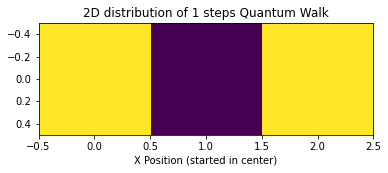

In [14]:
Plot2D(PositionMap,N)

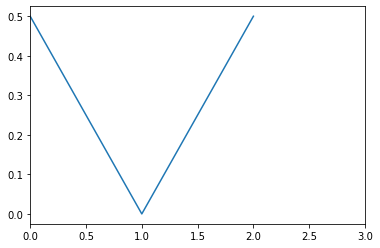

In [15]:
fig = figure()
ax = fig.add_subplot(111)

plot(arange(P), prob)
xlim(0, P)

show()

## Translation Operator for $\delta = \pi$

In [16]:
LPlus = roll(eye(P), 1, axis=0)
LMinus = roll(eye(P), -1, axis=0)
a = 0 #math.pi/2
Ipi = I * math.cos(a/2)
Txpi = (1j *math.sin(a/2)*kron(LPlus, C10) + 1j* math.sin(a/2)*kron(LMinus, C01) + kron(eye(P), Ipi))*sqrt(2.)/2

### Solving for this new T

In [17]:
Upi = Txpi.dot(Coin)

In [18]:
initialPosition = zeros(P)
initialPosition[N] = 1     # array indexing starts from 0, so index N is the central posn
psi0 = kron(initialPosition,(ket0+ket1)/sqrt(2.))

In [19]:
psiNpi = linalg.matrix_power(Upi, N).dot(psi0) #the state of the system after N random quantum steps.

In [20]:
#Measurement operator
probpi = empty(P)
PositionMappi=zeros([1, P])
for k in range(P):
    posnpi = zeros(P)
    posnpi[k] = 1     
    M_hat_kpi = kron( outer(posnpi,posnpi), eye(2))
    projpi = M_hat_kpi.dot(psiNpi)
    probpi[k] = projpi.dot(projpi.conjugate()).real
    PositionMappi[0][k] = probpi[k]

In [21]:
PositionMappi

array([[0. , 0.5, 0. ]])

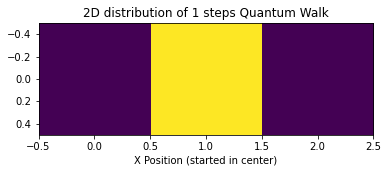

In [22]:
Plot2D(PositionMappi,N)

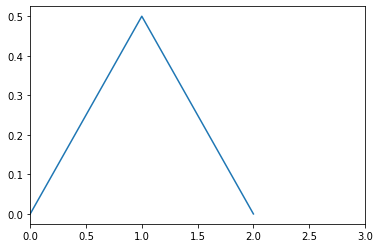

In [23]:
fig2 = figure()
ax2 = fig2.add_subplot(111)

plot(arange(P), probpi)
xlim(0, P)


show()